In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

In [3]:
cancer_data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
cancer_data['target'] = raw_data['target']

In [4]:
cancer_data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [5]:
X = cancer_data.drop('target', axis=1)
y = cancer_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(69)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
def get_classifier_metrics(classifier, X, y, X_train, X_test, y_train, y_test, folds = 5):
    from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
    from sklearn.model_selection import cross_val_score
    import matplotlib.pyplot as plt
    
    print('Accuracy')
    print('----------------------')
    print(f'Accuracy Score Train Data: {classifier.score(X_train, y_train)*100:.2f}%')
    print(f'Accuracy Score Test Data: {classifier.score(X_test, y_test)*100:.2f}%')

    print()
    print('Cross Validation Score')
    print('----------------------')    
    cvs = cross_val_score(classifier, X_test, y_test, cv=folds)
    print(f'Cross Validation Score {folds} folds: {np.round(cvs*100)}')
    print(f'Mean Cross Validation Score {folds} folds: {np.mean(np.round(cvs*100)):.2f}%')

    print()
    print('ROC Curve and AUC')
    print('----------------------')
    
    y_predictions = classifier.predict_proba(X_test)
    y_preds = y_predictions[:,1]
    auc = roc_auc_score(y_test, y_preds)
    print(f'Area Under Curve: {auc*100:.2f}%')
    print()
    
    fpr, tpr, tresholds = roc_curve(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(fpr, tpr, color='orange', label='ROC Curve')
    ax.plot([0,1], [0,1], color='red', label='Guess', linestyle='-.')
    ax.set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.legend()
    plt.show()

    print()
    print('Confusion Matrix')
    print('----------------------')
    y_preds = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_preds)
    plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    plot.plot()
    plt.show()

    print()
    print('Classification Report')
    report = classification_report(y_test, y_preds, output_dict=True)
    print(pd.DataFrame(report))

Accuracy
----------------------
Accuracy Score Train Data: 100.00%
Accuracy Score Test Data: 97.37%

Cross Validation Score
----------------------
Cross Validation Score 5 folds: [ 96.  96.  91.  96. 100.]
Mean Cross Validation Score 5 folds: 95.80%

ROC Curve and AUC
----------------------
Area Under Curve: 99.87%



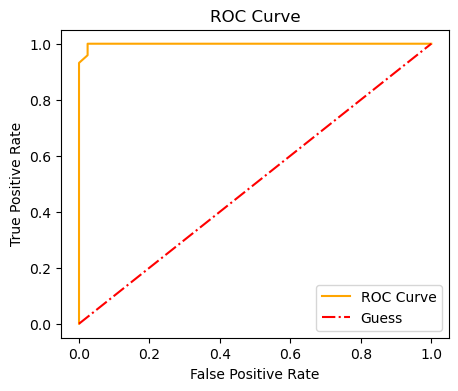


Confusion Matrix
----------------------


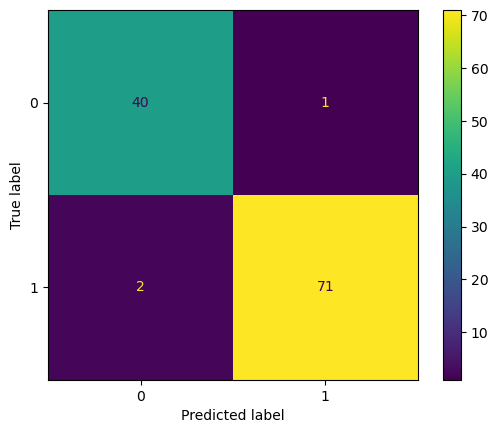


Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.990610    0.997191  0.994728    0.993901      0.994739
recall       0.995283    0.994398  0.994728    0.994840      0.994728
f1-score     0.992941    0.995792  0.994728    0.994367      0.994730
support    212.000000  357.000000  0.994728  569.000000    569.000000


In [12]:
get_classifier_metrics(clf, X, y, X_train, X_test, y_train, y_test, 5)